In [310]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans



# loading the data from csv

In [295]:
# Replace 'your_data.csv' with the actual path to your CSV file
data = pd.read_csv('data_classification_training.csv')
data.dropna()

data['weekday'] = pd.to_datetime(data['duration']).dt.weekday
data['hour'] = pd.to_datetime(data['duration']).dt.hour

# Extract features based on data types

# Label encoding for categorical feature (label)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
target = data['label']  # Extract target variable

features = data[['amount','vpa','weekday','hour','bank']]








In [296]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

(542, 5)
(1, 5)
(542,)
(1,)


In [297]:
# Feature scaling for numerical features (amount and timestamp)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[['amount', 'weekday','hour','vpa_1']])
# X_test_scaled = scaler.transform(X_test[['amount', 'weekday','hour','vpa_1']])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['amount','weekday','hour','bank']])
X_test_scaled = scaler.transform(X_test[['amount','weekday','hour','bank']])

In [298]:
# TF-IDF vectorization for text feature (vpa)
vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X_train_vpa_vectorized = vectorizer.fit_transform(X_train['vpa'])
X_test_vpa_vectorized = vectorizer.transform(X_test['vpa'])

print("Shape of X_train_scaled:", X_train_scaled.shape)
# print("Shape of X_train_vpa_vectorized:", X_train_vpa_vectorized.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
# print("Shape of X_test_vpa_vectorized:", X_test_vpa_vectorized.shape)
# print("Shape of X_train_vpa_vectorized:", pd.DataFrame(X_train_vpa_vectorized.toarray()))



Shape of X_train_scaled: (542, 4)
Shape of X_test_scaled: (1, 4)


In [299]:

X_train_combined = np.hstack((X_train_scaled, X_train_vpa_vectorized.toarray()))  # Or use np.vstack or concatenation with axis=1
X_test_combined = np.hstack((X_test_scaled, X_test_vpa_vectorized.toarray()))


# X_train_combined = np.hstack((X_train_scaled))  # Or use np.vstack or concatenation with axis=1
# X_test_combined = np.hstack((X_test_scaled))

print(X_test_combined.shape)
print(X_train_combined.shape)



(1, 108)
(542, 108)


In [325]:

## Experimenting with the different configuration
# Define candidate kernels (uncomment desired options)
kernels = {'linear': ('linear', None), 'rbf': ('rbf', SVC(kernel='rbf'))}

# Define hyperparameter ranges for grid search (adjust as needed)
param_grid = {'C': [0.1, 1,2,3,4,5,6,7,8,9, 10], 'gamma': [0.01, 0.1, 1,2,3,4,5,6,7]}

# Create a grid search object
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='f1_macro')

# Fit the grid search to your data (replace with your features)
grid_search.fit(X_train_combined, y_train)

# Best performing kernel and hyperparameters
best_kernel = grid_search.best_estimator_.kernel
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Create an SVM model with the best configuration

svm_clf = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [333]:
# svm_clf = SVC(kernel='linear', C=1.0)  # Experiment with different kernels (e.g., 'rbf') and C values
# svm_clf.fit(X_train_scaled, y_train)
# svm_clf = SVC(kernel='rbf', C=1.6)  # Experiment with different kernels (e.g., 'rbf') and C values

svm_clf = SVC(kernel='linear', C=6.0)  # Experiment with different kernels (e.g., 'rbf') and C values
svm_cl = SVC(kernel='rbf', C=6.0)  # Experiment with different kernels (e.g., 'rbf') and C values

svm_clf.fit(X_train_combined, y_train)
svm_cl.fit(X_train_combined, y_train)

SVC(C=6.0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

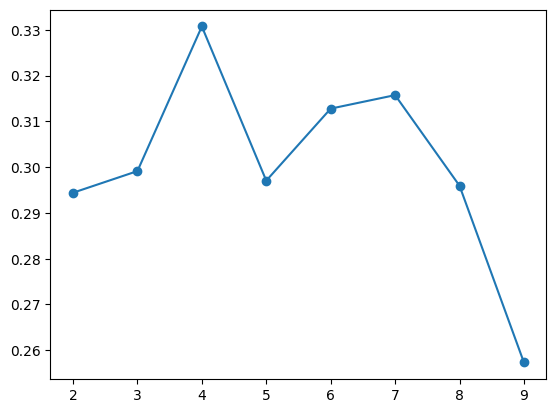

## Trying Kmeans for while
need to figure out the K value when plotting graph got to know tehe value of the k as 4 to be optimal but this approch is more of the unsupersived clustering of the data.

In [ ]:
# silhouette_scores = []
# from sklearn.metrics import silhouette_score

# for k in range(2, 10):  # Adjust the range based on your data
#       # Clustering with DBSCAN
#       kmeans = KMeans(n_clusters=k, random_state=0)
#       kmeans.fit(X_train_combined)

#       # Evaluation
#       silhouette_score_ = silhouette_score(X_train_combined, kmeans.labels_)
#       silhouette_scores.append(silhouette_score_)

# import matplotlib.pyplot as plt

# plt.plot(range(2, 10), silhouette_scores, marker='o')

# kmeans = KMeans(n_clusters=4, random_state=0)

# cluster_labels = kmeans.fit_predict(new_data_combined)
# new_data['label_k'] = label_encoder.inverse_transform(cluster_labels)
# print(new_data.head(20))

### Loading Testing data and processing before predicting the labels

In [322]:
# Assuming new data follows the same format as features

new_data = pd.read_csv('new_data.csv')

# Pre-process new data using the fitted pipeline
new_data['weekday'] = pd.to_datetime(new_data['duration']).dt.weekday
new_data['hour'] = pd.to_datetime(new_data['duration']).dt.hour
scaler = StandardScaler()

new_data_scaled = scaler.fit_transform(new_data[['amount','weekday','hour','bank']])
new_data_vectorized = vectorizer.transform(new_data['vpa'])

new_data_combined = np.hstack((new_data_scaled, new_data_vectorized.toarray()))  # Or use np.vstack or concatenation with axis=1


print(new_data_scaled.shape)
print(new_data_combined.shape)
print(X_test_combined.shape)





(460, 4)
(460, 108)
(1, 108)


In [ ]:
#

In [338]:
# X_test_combined = X_test_combined.reshape(1,-1)
# predictions = svm_clf.predict(X_test_scaled)
predictions = svm_clf.predict(new_data_combined)
predictions_l = svm_cl.predict(new_data_combined)


# Decode predictions using the label encoder for interpretation (optional)
new_data['label'] = label_encoder.inverse_transform(predictions)
new_data['label_l'] = label_encoder.inverse_transform(predictions_l)

h = new_data[['amount','vpa','label','label_l', 'bank']]

print(h[h['bank']==0].head(30))


      amount                                    vpa          label  \
0      680.0                 grofers1paytm@hdfcbank        Bisleri   
1       30.0                         Q919833916@ybl   Office Smoke   
2       99.0                   paytm-82845728@paytm   Office Smoke   
3      500.0                       8815224653@paytm         Rapido   
4      215.0  bundltechnologiespvtltdswiggy.rzp@sbi       Lazy Pay   
5      719.0                    airtel66.payu@icici         Swiggy   
6       80.0         BHARATPE09917518561@yesbankltd            ola   
7      112.0                         9886974492@ybl    TVS service   
8      500.0               appleservices.bdpg@icici   Apple Wallet   
9       99.0                     90198026681122@axl            ola   
10     341.0  bundltechnologiespvtltdswiggy.rzp@sbi        Blinkit   
125    780.0                   paytm-60948055@paytm  Home TataPlay   
126    150.0                   paytm-42307825@paytm            ola   
182   3000.0        

#Result

1.   
2.   List item

